# ADS 509 Module 3: Group Comparison 
## Gonzalo Blazquez

The task of comparing two groups of text is fundamental to textual analysis. There are innumerable applications: survey respondents from different segments of customers, speeches by different political parties, words used in Tweets by different constituencies, etc. In this assignment you will build code to effect comparisons between groups of text data, using the ideas learned in reading and lecture.

This assignment asks you to analyze the lyrics for the two artists you selected in Module 1 and the Twitter descriptions pulled for Robyn and Cher. If the results from that pull were not to your liking, you are welcome to use the zipped data from the “Assignment Materials” section. Specifically, you are asked to do the following: 

* Read in the data, normalize the text, and tokenize it. When you tokenize your Twitter descriptions, keep hashtags and emojis in your token set. 
* Calculate descriptive statistics on the two sets of lyrics and compare the results. 
* For each of the four corpora, find the words that are unique to that corpus. 
* Build word clouds for all four corpora. 

Each one of the analyses has a section dedicated to it below. Before beginning the analysis there is a section for you to read in the data and do your cleaning (tokenization and normalization). 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [3]:
import os
import re
import emoji
import pandas as pd

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


C:\Users\Gonzalo B\AppData\Local\Temp\ipykernel_15176\2940468089.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# Use this space for any additional import statements you need
#import numpy as np


In [5]:
# Place any addtional functions or constants you need here. 

# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
sw = set(stopwords.words("english"))

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

# It's handy to have a full set of emojis
all_language_emojis = set()

for country in emoji.EMOJI_DATA : 
    for em in emoji.EMOJI_DATA[country] : 
        all_language_emojis.add(em)

# and now our functions
def descriptive_stats(tokens, top_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """
    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens / num_tokens
    num_characters = sum(len(token) for token in tokens)

    token_counts = Counter(tokens)
    most_common_tokens = token_counts.most_common(top_tokens)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        print(f"The five most common tokens in the data:")
        for token, count in most_common_tokens:
            print(f"{token}: {count}")
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])


    
def contains_emoji(s):
    
    s = str(s)
    emojis = [ch for ch in s if emoji.is_emoji(ch)]

    return(len(emojis) > 0)


def remove_stop(tokens) :
    # modify this function to remove stopwords
    tokens2 = [word for word in tokens if word not in sw]
    return(tokens2)
 
def remove_punctuation(text, punct_set=tw_punct) : 
    return(''.join([ch for ch in text if ch not in punct_set]))

def remove_punctuation_not_emoji(text, punct_set=tw_punct):
    return ''.join([ch for ch in text if ch not in punct_set or contains_emoji(ch)])


def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    
    # modify this function to return tokens
    tokens = text.split()
    return(tokens)

def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)

## Data Ingestion

Use this section to ingest your data into the data structures you plan to use. Typically this will be a dictionary or a pandas DataFrame.

In [6]:
# Feel fre to use the below cells as an example or read in the data in a way you prefer

data_location = "/users/Gonzalo B/Downloads/AppliedTextMining/Module2/Assign 2/M1 Results/" # change to your location if it is not in the same directory as your notebook
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

artist_files = {'cher':'cher_followers_data.txt',
                'robyn':'robynkonichiwa_followers_data.txt'}


In [7]:
twitter_data = pd.read_csv(data_location + twitter_folder + artist_files['cher'],
                           sep="\t",
                           quoting=3)

twitter_data['artist'] = "cher"

In [8]:
twitter_data_2 = pd.read_csv(data_location + twitter_folder + artist_files['robyn'],
                             sep="\t",
                             quoting=3)
twitter_data_2['artist'] = "robyn"

twitter_data = pd.concat([
    twitter_data,twitter_data_2])
    
del(twitter_data_2)

In [9]:
twitter_data.head(5)

,screen_name,name,id,location,followers_count,friends_count,description,artist
0,hsmcnp,Country Girl,35152213,NaN,1302,1014,NaN,cher
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher
2,anju79990584,anju,1496463006451974150,NaN,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher
3,gallionjenna,J,3366479914,NaN,752,556,csu,cher
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...,cher


In [10]:
twitter_desc=twitter_data[['description', 'artist']]

In [11]:
# Read in the lyrics data (from module 2 code)
lyrics_list = []

for artist_folder in os.listdir(os.path.join(data_location, lyrics_folder)):
    artist_path = os.path.join(data_location, lyrics_folder, artist_folder)
    
    for song_file in os.listdir(artist_path):
        song_path = os.path.join(artist_path, song_file)
        
        # Extract lyrics
        with open(song_path, 'r', encoding='utf-8') as file:
            lines = file.readlines()
            lyrics = ''.join(lines[4:]).strip()  # First 4 lines removed
            song_title = lines[0].strip().strip('"') 
        
        # Create list
        lyrics_list.append({
            'artist': artist_folder,
            'song_title': song_title,
            'lyrics': lyrics
        })

lyrics_data = pd.DataFrame(lyrics_list)
lyrics_data.head(5)

,artist,song_title,lyrics
0,cher,88 Degrees,"Stuck in L.A., ain't got no friends \nAnd so H..."
1,cher,A Different Kind Of Love Song,What if the world was crazy and I was sane\nWo...
2,cher,After All,"Well, here we are again\nI guess it must be fa..."
3,cher,Again,Again evening finds me at your door \nHere to ...
4,cher,Alfie,"What's it all about, Alfie?\nIs it just for th..."


## Tokenization and Normalization

In this next section, tokenize and normalize your data. We recommend the following cleaning. 

**Lyrics** 

* Remove song titles
* Casefold to lowercase
* Remove stopwords (optional)
* Remove punctuation
* Split on whitespace

Removal of stopwords is up to you. Your descriptive statistic comparison will be different if you include stopwords, though TF-IDF should still find interesting features for you. Note that we remove stopwords before removing punctuation because the stopword set includes punctuation.

**Twitter Descriptions** 

* Casefold to lowercase
* Remove stopwords
* Remove punctuation other than emojis or hashtags
* Split on whitespace

Removing stopwords seems sensible for the Twitter description data. Remember to leave in emojis and hashtags, since you analyze those. 

In [12]:
# The lyrics do not have the song name at the beginning because the first 4 lines are not considered in the data ingestion.
# apply the `pipeline` techniques from BTAP Ch 1 or 5

my_pipeline =  [str.lower, remove_punctuation, tokenize, remove_stop]

lyrics_data["tokens"] = lyrics_data["lyrics"].apply(prepare,pipeline=my_pipeline)
lyrics_data["num_tokens"] = lyrics_data["tokens"].map(len)

my_pipeline2 = [str.lower, remove_punctuation_not_emoji, tokenize]

twitter_data["tokens"] = twitter_data["description"].apply(prepare,pipeline=my_pipeline2)
twitter_data["num_tokens"] = twitter_data["tokens"].map(len) 

In [13]:
lyrics_data.head(5)

,artist,song_title,lyrics,tokens,num_tokens
0,cher,88 Degrees,"Stuck in L.A., ain't got no friends \nAnd so H...","[stuck, la, aint, got, friends, hollywood, nut...",180
1,cher,A Different Kind Of Love Song,What if the world was crazy and I was sane\nWo...,"[world, crazy, sane, would, strange, cant, bel...",133
2,cher,After All,"Well, here we are again\nI guess it must be fa...","[well, guess, must, fate, weve, tried, deep, i...",120
3,cher,Again,Again evening finds me at your door \nHere to ...,"[evening, finds, door, ask, could, try, dont, ...",34
4,cher,Alfie,"What's it all about, Alfie?\nIs it just for th...","[whats, alfie, moment, live, whats, sort, alfi...",66


In [14]:
twitter_data.head(5)

,screen_name,name,id,location,followers_count,friends_count,description,artist,tokens,num_tokens
0,hsmcnp,Country Girl,35152213,NaN,1302,1014,NaN,cher,[nan],1
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher,"[𝙿𝚛𝚘𝚞𝚍, 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛, 𝚘𝚏, 𝚖𝚎𝚜𝚜𝚢, 𝚋𝚞𝚗𝚜, 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜]",6
2,anju79990584,anju,1496463006451974150,NaN,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher,"[163㎝／愛かっぷ💜26歳🍒, 工〇好きな女の子💓, フォローしてくれたらdmします🧡]",3
3,gallionjenna,J,3366479914,NaN,752,556,csu,cher,[csu],1
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...,cher,"[writer, washinformer, spelmancollege, alumna,...",17


In [15]:
twitter_data['has_emoji'] = twitter_data["description"].apply(contains_emoji)

In [16]:
################################################################
def count_emojis_in_tokens(tokens):
    if not isinstance(tokens, list):  # Check if tokens is a list
        return 0
    # Count the total number of emojis in the list of tokens
    return sum(sum(1 for char in token if emoji.is_emoji(char)) for token in tokens)

# Calculate the total number of emojis in the 'tokens' column
total_emojis_tokens = twitter_data['tokens'].apply(count_emojis_in_tokens).sum()

# Print the total number of emojis in the tokens column
print("Total number of emojis in the tokens column:", total_emojis_tokens)

Total number of emojis in the tokens column: 1232805


Let's take a quick look at some descriptions with emojis.

In [17]:
twitter_data[twitter_data.has_emoji].sample(10)[["artist","description","tokens"]]

,artist,description,tokens
310578,cher,‏‏الحمد الله🍂🤲,"[‏‏الحمد, الله🍂🤲]"
2872264,cher,♥♥,[♥♥]
3912623,cher,"People say that nothing is perfect. Well, than...","[people, say, that, nothing, is, perfect, well..."
593167,cher,Ariana fan account 🖤 spreading love n light,"[ariana, fan, account, 🖤, spreading, love, n, ..."
1382056,cher,⚡️,[⚡️]
222521,cher,Just looking arround😎,"[just, looking, arround😎]"
88578,robyn,✨Alla olika alla lika ✨Communications & digita...,"[✨alla, olika, alla, lika, ✨communications, di..."
708595,cher,Defined by the things I love. Mum. Nurse. Auss...,"[defined, by, the, things, i, love, mum, nurse..."
1989900,cher,💐 Teamwork makes the dream work 💐,"[💐, teamwork, makes, the, dream, work, 💐]"
2722252,cher,"27, Samuel Joseph William Denton❤","[27, samuel, joseph, william, denton❤]"


With the data processed, we can now start work on the assignment questions. 

Q: What is one area of improvement to your tokenization that you could theoretically carry out? (No need to actually do it; let's not make perfect the enemy of good enough.)

A: The tokenization is only being done by spliting at spaces, then the context is lost. This can be improved by using advance tokenization techniques like stemming and lemmatization.

## Calculate descriptive statistics on the two sets of lyrics and compare the results. 


In [18]:
cher_lyrics_tokens = lyrics_data[lyrics_data['artist'] == 'cher']['tokens'].tolist()  # Filter artist tokens
flattened_tokens = [token for sublist in cher_lyrics_tokens for token in sublist]  

descriptive_stats(flattened_tokens)

There are 35233 tokens in the data.
There are 3684 unique tokens in the data.
There are 169244 characters in the data.
The lexical diversity is 0.105 in the data.
The five most common tokens in the data:
love: 966
im: 511
know: 480
dont: 430
youre: 332


[35233, 3684, 0.10456106491073709, 169244]

In [19]:
robyn_lyrics_tokens = lyrics_data[lyrics_data['artist'] == 'robyn']['tokens'].tolist()  # Filter artist tokens
flattened_tokens = [token for sublist in robyn_lyrics_tokens for token in sublist]  

descriptive_stats(flattened_tokens)

There are 15041 tokens in the data.
There are 2139 unique tokens in the data.
There are 72804 characters in the data.
The lexical diversity is 0.142 in the data.
The five most common tokens in the data:
know: 305
im: 299
dont: 297
love: 269
got: 249


[15041, 2139, 0.1422112891430091, 72804]

Q: what observations do you make about these data? 

A: It was expected that Cher would have more tokens due to her larger catalog of songs. It is interesting that Robyn has a higher lexical diversity than Cher. Regarding the most common tokens, both artist have very similar top five words, repeating four of them (love, im, know, dont).


## Find tokens uniquely related to a corpus

Typically we would use TF-IDF to find unique tokens in documents. Unfortunately, we either have too few documents (if we view each data source as a single document) or too many (if we view each description as a separate document). In the latter case, our problem will be that descriptions tend to be short, so our matrix would be too sparse to support analysis. 

To avoid these problems, we will create a custom statistic to identify words that are uniquely related to each corpus. The idea is to find words that occur often in one corpus and infrequently in the other(s). Since corpora can be of different lengths, we will focus on the _concentration_ of tokens within a corpus. "Concentration" is simply the count of the token divided by the total corpus length. For instance, if a corpus had length 100,000 and a word appeared 1,000 times, then the concentration would be $\frac{1000}{100000} = 0.01$. If the same token had a concentration of $0.005$ in another corpus, then the concentration ratio would be $\frac{0.01}{0.005} = 2$. Very rare words can easily create infinite ratios, so you will also add a cutoff to your code so that a token must appear at least $n$ times for you to return it. 

An example of these calculations can be found in [this spreadsheet](https://docs.google.com/spreadsheets/d/1P87fkyslJhqXFnfYezNYrDrXp_GS8gwSATsZymv-9ms). Please don't hesitate to ask questions if this is confusing. 

In this section find 10 tokens for each of your four corpora that meet the following criteria: 

1. The token appears at least `n` times in all corpora
1. The tokens are in the top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora.

You will choose a cutoff for yourself based on the side of the corpus you're working with. If you're working with the Robyn-Cher corpora provided, `n=5` seems to perform reasonably well.

In [20]:
# Helped by AI to create this function
def concentration_ratios(corpora, n):
    frequencies = {}
    total_lengths = {name: 0 for name in corpora.keys()}

    # Calculate frequencies and total lengths for each corpus
    for name, lyrics in corpora.items():
        # Flatten the list of tokens
        tokens = [token for song in lyrics for token in song]
        frequencies[name] = Counter(tokens)
        total_lengths[name] = len(tokens)

    # Dictionary to hold the top tokens for each corpus
    top_tokens_per_corpus = {}

    # Iterate through each corpus to find top tokens
    for name in corpora.keys():
        ratios = {}
        
        for token in frequencies[name].keys():
            # Only consider tokens that appear at least `n` times in all corpora
            if all(frequencies[other_name][token] >= n for other_name in corpora.keys()):
                concentrations = {other_name: frequencies[other_name][token] / total_lengths[other_name] for other_name in corpora.keys()}
                
                # Calculate the concentration ratio of the current corpus against the sum of concentrations from other corpora
                current_concentration = frequencies[name][token] / total_lengths[name]
                total_other_concentration = sum(concentrations[other_name] for other_name in corpora if other_name != name)
                
                # Avoid division by zero
                if total_other_concentration > 0:
                    ratio = current_concentration / total_other_concentration
                    ratios[token] = ratio

        # Get top tokens for the current corpus
        top_tokens = sorted(ratios.items(), key=lambda x: x[1], reverse=True)[:10]
        top_tokens_per_corpus[name] = top_tokens

    return top_tokens_per_corpus

In [21]:
cher_twitter_tokens = twitter_data[twitter_data['artist'] == 'cher']['tokens'].tolist()  # Filter artist tokens
robyn_twitter_tokens = twitter_data[twitter_data['artist'] == 'robyn']['tokens'].tolist()  # Filter artist tokens

In [47]:
corpora = {
    'Cher_lyrics': cher_lyrics_tokens,
    'Robyn_lyrics': robyn_lyrics_tokens,
    'Cher_twitter': cher_twitter_tokens,
    'Robyn_twitter':robyn_twitter_tokens
}
top_tokens = concentration_ratios(corpora, n=5)

In [49]:
top_tokens['Cher_lyrics']

[('walk', 6.392604515462158),
 ('enough', 4.4138874804907635),
 ('tears', 4.135810326358928),
 ('strong', 3.100675463152436),
 ('without', 3.0086466322404455),
 ('find', 3.0008122309656224),
 ('knock', 2.8434461249687533),
 ('believe', 2.6513468724224785),
 ('understand', 2.646803250752197),
 ('man', 2.6249006641005432)]

In [50]:
top_tokens['Cher_twitter']

[('proud', 1.0121413981849228),
 ('best', 0.7181674911255851),
 ('news', 0.5983827357535149),
 ('god', 0.5832865094611949),
 ('old', 0.552578676142205),
 ('life', 0.5391838456188233),
 ('live', 0.5170541824184953),
 ('happy', 0.48646008933853563),
 ('friends', 0.44896560987675427),
 ('people', 0.407566815158277)]

In [51]:
top_tokens['Robyn_lyrics']

[('beat', 14.50826694018989),
 ('hang', 6.6494537452777305),
 ('alright', 5.979387953483407),
 ('shake', 5.719554536665193),
 ('forgive', 5.419618034069001),
 ('88', 5.39666814477976),
 ('dance', 5.308157467737371),
 ('pretend', 4.471228739945421),
 ('itll', 4.017785796544388),
 ('set', 3.940295670319001)]

In [52]:
top_tokens['Robyn_twitter']

[('music', 1.070033046829943),
 ('men', 0.5077879219000868),
 ('best', 0.4826845019685392),
 ('news', 0.3982066767687688),
 ('new', 0.3898218708426059),
 ('working', 0.38757881366169183),
 ('live', 0.356873734644459),
 ('since', 0.34011925400569765),
 ('things', 0.33548687826664736),
 ('old', 0.32848261300918674)]

Q: What are some observations about the top tokens? Do you notice any interesting items on the list? 

A: Words in twitter data have very low concentration compared to the lyrics data. This is probably because stopwords were only dropped from the twitter data. 

## Build word clouds for all four corpora. 

For building wordclouds, we'll follow exactly the code of the text. The code in this section can be found [here](https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch01/First_Insights.ipynb). If you haven't already, you should absolutely clone the repository that accompanies the book. 


In [29]:
from matplotlib import pyplot as plt

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

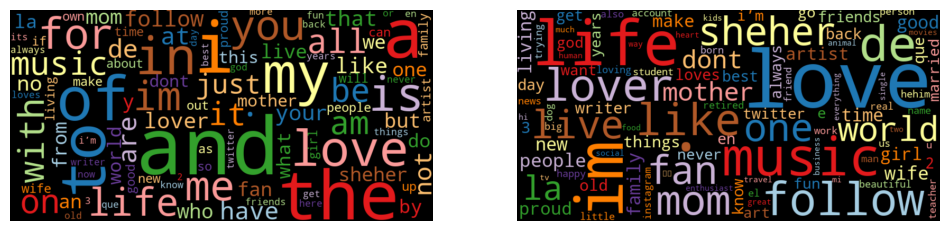

In [42]:
data= twitter_data[twitter_data['artist'] == 'cher'].dropna(subset=['description'])
freq_2015_df = count_words(data)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)###
wordcloud(freq_2015_df['freq'], max_words=100)
plt.subplot(1,2,2)###
wordcloud(freq_2015_df['freq'], max_words=100, stopwords=sw)

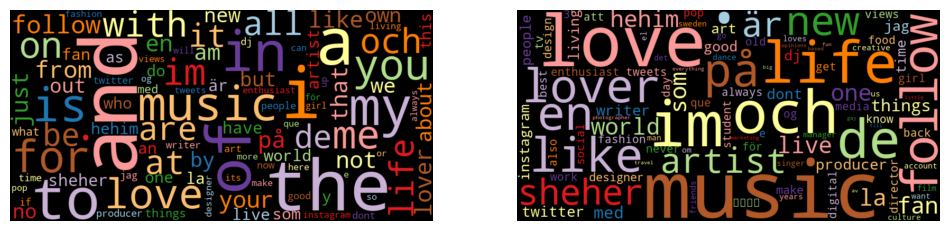

In [44]:
data= twitter_data[twitter_data['artist'] == 'robyn'].dropna(subset=['description'])
freq_2015_df = count_words(data)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)###
wordcloud(freq_2015_df['freq'], max_words=100)
plt.subplot(1,2,2)###
wordcloud(freq_2015_df['freq'], max_words=100, stopwords=sw)

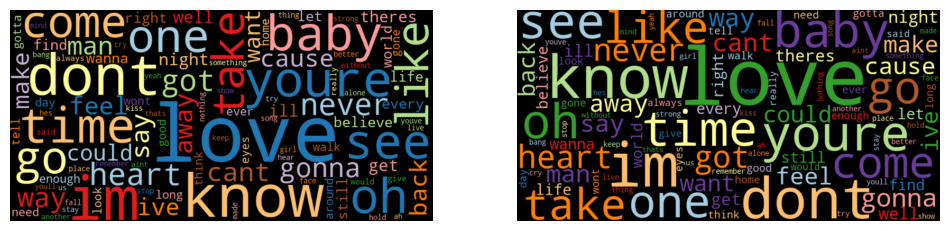

In [45]:
freq_2015_df = count_words(lyrics_data[lyrics_data['artist'] == 'cher'])
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)###
wordcloud(freq_2015_df['freq'], max_words=100)
plt.subplot(1,2,2)###
wordcloud(freq_2015_df['freq'], max_words=100, stopwords=sw)

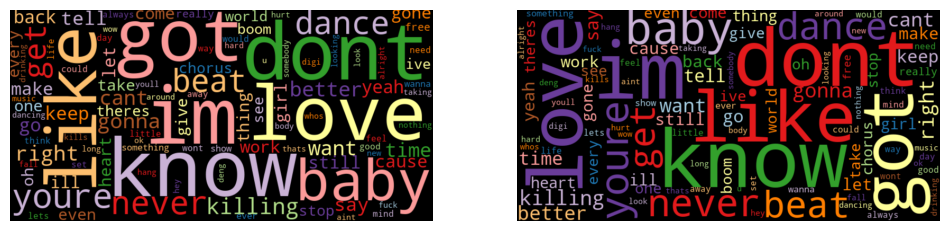

In [46]:
freq_2015_df = count_words(lyrics_data[lyrics_data['artist'] == 'robyn'])
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)###
wordcloud(freq_2015_df['freq'], max_words=100)
plt.subplot(1,2,2)###
wordcloud(freq_2015_df['freq'], max_words=100, stopwords=sw)

Q: What observations do you have about these (relatively straightforward) wordclouds? 

A: Only the data from twitter changes from one wordcloud to the other without stopwords, becuase it did not have them removed previously. Thus, the twitter data for both artists clearly shows many stopwords like 'and', 'the', 'to', and 'for'. Both artists present similar frequent words in lyrics and twitter data, 'love', 'know', and 'baby' pop up from lyrics, while 'music', 'follow', and 'love' for twitter.